In [ ]:

from stable_baselines3 import A2C,PPO,SAC

import gymnasium as gym
import gym_unbalanced_disk
import numpy as np
import matplotlib.pyplot as plt
import time
# This code is shows the reference tracking training implementation

In [2]:
#Get gym environment
env = gym_unbalanced_disk.UnbalancedDisk_sincos()


reference angle=181.26153807436486


In [3]:
## SB3 stuff

model = SAC('MlpPolicy',env= env, verbose=1)   
model.learn(total_timesteps=150000,log_interval = 100)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
reference angle=170.39819273935925
reference angle=194.32085381139953
reference angle=185.23101853024323
reference angle=175.445675419811
reference angle=194.33891266965705
reference angle=180.05418074144026
reference angle=184.56223473799025
reference angle=177.73448635784547
reference angle=168.9106136664987
reference angle=168.0563933161012
reference angle=166.89960111507693
reference angle=175.45059663124718
reference angle=176.66587822310262
reference angle=167.24583908047194
reference angle=174.4615625340339
reference angle=183.2627089342877
reference angle=172.1312884220324
reference angle=172.11518913013867
reference angle=167.39658464322642
reference angle=194.71154680143422
reference angle=169.203049151724
reference angle=190.9748953857806
reference angle=173.00493187979006
reference angle=184.64546039731684
reference angle=186.85694827556742
reference angle=185.3003698868124
referen

In [ ]:

# Running the simulation
obs, info = env.reset()
theta_save = []
omega_save = []
reward_save = []
reference_save = []
try:
    for i in range(1000):
        if i % 200 == 0:
            env.reference = np.random.uniform(low=np.deg2rad(165), high=np.deg2rad(195))
            print("New reference angle:", np.rad2deg(env.reference))
        action, _states = model.predict(obs,deterministic = True)
        obs, reward, terminated, truncated, info = env.step(action)
        env.render()
        #time.sleep(1/25)
        #print(obs, reward,action)
        theta_save.append(np.arctan2(obs[0],obs[1]))
        omega_save.append(obs[2])
        reward_save.append(reward)    
        reference_save.append(env.reference) 

finally:
    env.close()

reference angle=177.89808516227578
New reference angle: 179.25396262900102
New reference angle: 165.3537443153081
New reference angle: 169.51039271629125
New reference angle: 182.53262967002607
New reference angle: 184.39988378506635


In [26]:
print(np.rad2deg(theta_save[-1])%360)

185.07579155551497


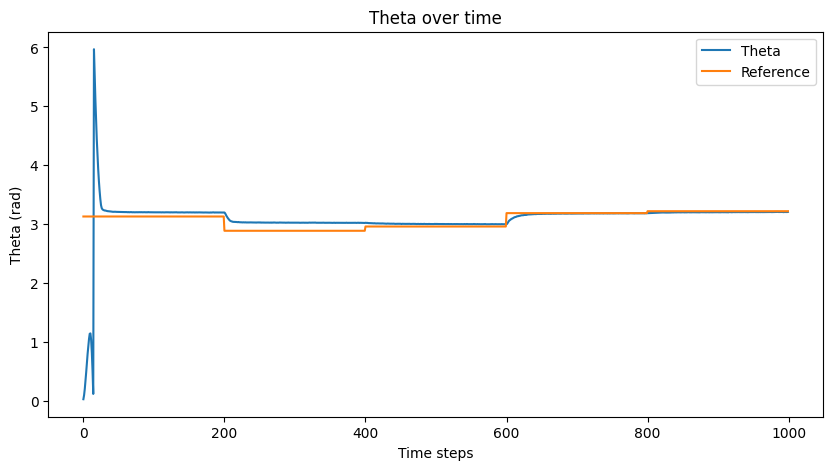

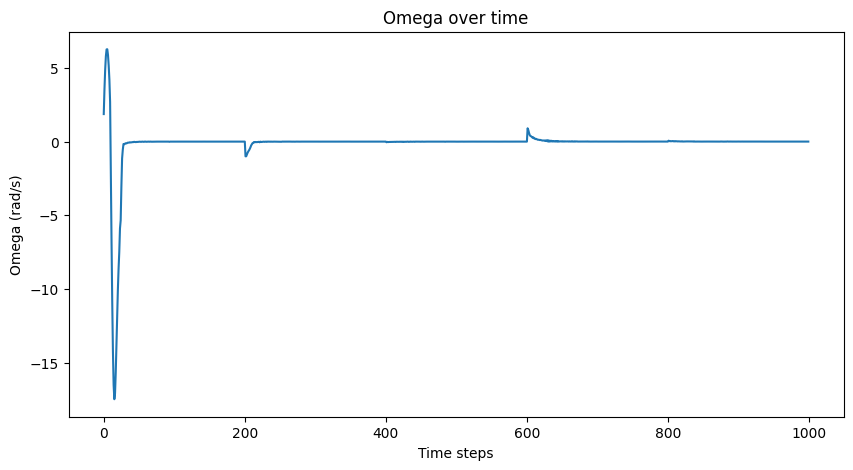

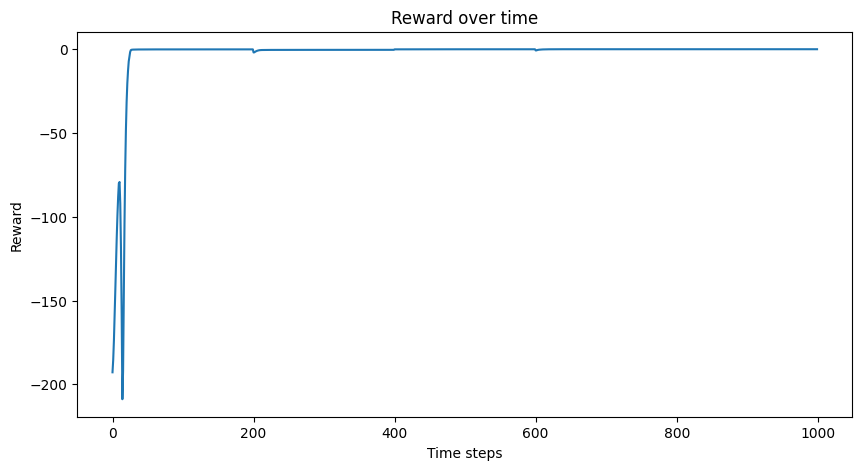

[np.float64(0.024942872744273408), np.float64(0.0941468595472495), np.float64(0.20104869883537974), np.float64(0.3335271001637732), np.float64(0.48497487226488195), np.float64(0.6443464731397459), np.float64(0.7964455355932678), np.float64(0.934417942769889), np.float64(1.0507060637385106), np.float64(1.1367696864209558), np.float64(1.1426245735326717), np.float64(1.0329051118532324), np.float64(0.8146003361615789), np.float64(0.5021339612909049), np.float64(0.11474102831874135), np.float64(-0.3134613685555989), np.float64(-0.7475903191734697), np.float64(-1.159235896116285), np.float64(-1.5252357019275644), np.float64(-1.8444919855937083), np.float64(-2.117189694234909), np.float64(-2.3504442623342623), np.float64(-2.5510958081261266), np.float64(-2.7174734503005147), np.float64(-2.8569263571399808), np.float64(-2.96184929547216), np.float64(-3.011485874387341), np.float64(-3.032631877023109), np.float64(-3.0418291916575226), np.float64(-3.047263215099178), np.float64(-3.0527227977200

In [29]:
#Plotting
plt.figure(figsize=(10,5))  
plt.plot(np.array(theta_save)%(2*np.pi), label='Theta')  
plt.plot(reference_save, label='Reference')   
plt.xlabel('Time steps')
plt.legend()
plt.title('Theta over time')
plt.ylabel('Theta (rad)')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(omega_save, label='Omega')
plt.xlabel('Time steps')
plt.title('Omega over time')
plt.ylabel('Omega (rad/s)')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(reward_save, label='Reward')
plt.xlabel('Time steps')
plt.title('Reward over time')
plt.ylabel('Reward')
plt.show()
print(theta_save)

In [7]:
## grid search
model.save("models/RL/sac_diffangle_7")